In [1]:
from tuning_classes import *

In [2]:
encodings = open_umappings('C:/Users/Charl/Documents/Projects/TokenizedToast/Data/umaps_wikipedia.pkl')

# Tuning HBDSCAN

In [6]:
# Define your lists of hyperparameters
min_cluster_sizes = [10, 20, 30]
cluster_selection_epsilons = [0.1, 0.5, 1.0]
cluster_selection_methods = ['leaf', 'eom']
alphas = [0.1, 0.2, 0.3]
metrics = ['euclidean', 'manhattan']

# Empty list to store model dictionaries
model_results = []

# Loop over all combinations of hyperparameters
for min_cluster_size in min_cluster_sizes:
    for cluster_selection_epsilon in cluster_selection_epsilons:
        for cluster_selection_method in cluster_selection_methods:
            for alpha in alphas:
                for metric in metrics:
                    # Dictionary to store model parameters and metrics
                    model_dict = {}
                    # Train the model
                    model, model_dict = train_hdbscan(model_dict, encodings, min_cluster_size, cluster_selection_epsilon, 
                                               cluster_selection_method, alpha, metric)
                    # Compute and store the metrics
                    model_dict = silhouette(model_dict, encodings, model)
                    model_dict = calinski_harabasz(model_dict, encodings, model)
                    model_dict = davies_bouldin(model_dict, encodings, model)
                    # Add the dictionary to the list
                    model_results.append(model_dict)


In [8]:
with open('hbd-tuning-results.pkl', 'wb') as f:
    pickle.dump(model_results, f)

# Tuning Kmeans

In [4]:
# Define your lists of hyperparameters
n_clusters_list = [100, 1000, 5000]
init_list = ['k-means++', 'random']
n_init_list = [10, 15, 20]
max_iter_list = [100, 200, 300]
tol_list = [1e-4, 1e-3, 1e-2]

# Empty list to store model dictionaries
model_dicts = []

# Loop over all combinations of hyperparameters
for n_clusters in n_clusters_list:
    for init in init_list:
        for n_init in n_init_list:
            for max_iter in max_iter_list:
                for tol in tol_list:
                    # Dictionary to store model parameters and metrics
                    model_dict = {}
                    # Train the model
                    model, model_dict = train_kmeans(model_dict, encodings, n_clusters, init, n_init, max_iter, tol)
                    # Compute and store the metrics
                    model_dict = silhouette(model_dict, encodings, model)
                    model_dict = calinski_harabasz(model_dict, encodings, model)
                    model_dict = davies_bouldin(model_dict, encodings, model)
                    # Add the dictionary to the list
                    model_dicts.append(model_dict)


c:\Users\Charl\Documents\Projects\TokenizedToast\Machine-Learning\Clustering\Research\tuning_classes.py:56: ConvergenceWarning: Number of distinct clusters (999) found smaller than n_clusters (1000). Possibly due to duplicate points in X.
  model.fit(encodings)


In [5]:
with open('kmeans-tuning-results.pkl', 'wb') as f:
    pickle.dump(model_dicts, f)

# Analysis 

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [6]:
import pandas as pd


In [10]:
with open('hbd-tuning-results.pkl', 'rb') as f:
    h = pickle.load(f)
    h_df = pd.DataFrame(h)

In [8]:
k_df = pd.DataFrame(model_dicts)

In [27]:
k_df.sort_values('silhoutte_score', ascending=False).head(10)

,algorithm,copy_x,init,max_iter,n_clusters,n_init,random_state,tol,verbose,silhoutte_score,calinski_harabasz_score,davies_bouldin_score
21,lloyd,True,k-means++,200,100,20,42,0.0001,0,0.428398,64321.928975,0.742640
18,lloyd,True,k-means++,100,100,20,42,0.0001,0,0.428398,64321.928975,0.742640
24,lloyd,True,k-means++,300,100,20,42,0.0001,0,0.428398,64321.928975,0.742640
0,lloyd,True,k-means++,100,100,10,42,0.0001,0,0.424111,64268.213276,0.762036
3,lloyd,True,k-means++,200,100,10,42,0.0001,0,0.424111,64268.213276,0.762036
6,lloyd,True,k-means++,300,100,10,42,0.0001,0,0.424111,64268.213276,0.762036
9,lloyd,True,k-means++,100,100,15,42,0.0001,0,0.424111,64268.213276,0.762036
15,lloyd,True,k-means++,300,100,15,42,0.0001,0,0.424111,64268.213276,0.762036
12,lloyd,True,k-means++,200,100,15,42,0.0001,0,0.424111,64268.213276,0.762036
13,lloyd,True,k-means++,200,100,15,42,0.0010,0,0.423157,64192.162735,0.764635


In [28]:
k_df.sort_values('calinski_harabasz_score', ascending=False).head(10)

,algorithm,copy_x,init,max_iter,n_clusters,n_init,random_state,tol,verbose,silhoutte_score,calinski_harabasz_score,davies_bouldin_score
72,lloyd,True,k-means++,100,1000,20,42,0.0001,0,0.411322,100398.488808,0.801116
57,lloyd,True,k-means++,200,1000,10,42,0.0001,0,0.411322,100398.488808,0.801116
78,lloyd,True,k-means++,300,1000,20,42,0.0001,0,0.411322,100398.488808,0.801116
66,lloyd,True,k-means++,200,1000,15,42,0.0001,0,0.411322,100398.488808,0.801116
75,lloyd,True,k-means++,200,1000,20,42,0.0001,0,0.411322,100398.488808,0.801116
60,lloyd,True,k-means++,300,1000,10,42,0.0001,0,0.411322,100398.488808,0.801116
69,lloyd,True,k-means++,300,1000,15,42,0.0001,0,0.411322,100398.488808,0.801116
54,lloyd,True,k-means++,100,1000,10,42,0.0001,0,0.411322,100398.488808,0.801116
63,lloyd,True,k-means++,100,1000,15,42,0.0001,0,0.411324,100398.327944,0.801112
73,lloyd,True,k-means++,100,1000,20,42,0.0010,0,0.410865,100320.401796,0.802179


In [29]:
k_df.sort_values('davies_bouldin_score', ascending=True).head(10)

,algorithm,copy_x,init,max_iter,n_clusters,n_init,random_state,tol,verbose,silhoutte_score,calinski_harabasz_score,davies_bouldin_score
21,lloyd,True,k-means++,200,100,20,42,0.0001,0,0.428398,64321.928975,0.742640
18,lloyd,True,k-means++,100,100,20,42,0.0001,0,0.428398,64321.928975,0.742640
24,lloyd,True,k-means++,300,100,20,42,0.0001,0,0.428398,64321.928975,0.742640
0,lloyd,True,k-means++,100,100,10,42,0.0001,0,0.424111,64268.213276,0.762036
15,lloyd,True,k-means++,300,100,15,42,0.0001,0,0.424111,64268.213276,0.762036
12,lloyd,True,k-means++,200,100,15,42,0.0001,0,0.424111,64268.213276,0.762036
9,lloyd,True,k-means++,100,100,15,42,0.0001,0,0.424111,64268.213276,0.762036
3,lloyd,True,k-means++,200,100,10,42,0.0001,0,0.424111,64268.213276,0.762036
6,lloyd,True,k-means++,300,100,10,42,0.0001,0,0.424111,64268.213276,0.762036
7,lloyd,True,k-means++,300,100,10,42,0.0010,0,0.423157,64192.162735,0.764635


# HBDSCAN 

In [36]:
h_df.sort_values('silhoutte_score', ascending=False).head(10)

,algorithm,allow_single_cluster,alpha,approx_min_span_tree,cluster_selection_epsilon,cluster_selection_method,core_dist_n_jobs,gen_min_span_tree,leaf_size,match_reference_implementation,max_cluster_size,memory,metric,min_cluster_size,min_samples,p,prediction_data,silhoutte_score,calinski_harabasz_score,davies_bouldin_score
106,best,False,0.3,True,1.0,eom,4,False,40,False,0,Memory(location=None),euclidean,30,None,None,True,0.076409,4343.497509,1.399688
96,best,False,0.1,True,1.0,leaf,4,False,40,False,0,Memory(location=None),euclidean,30,None,None,True,0.076409,4343.497509,1.399688
98,best,False,0.2,True,1.0,leaf,4,False,40,False,0,Memory(location=None),euclidean,30,None,None,True,0.076409,4343.497509,1.399688
100,best,False,0.3,True,1.0,leaf,4,False,40,False,0,Memory(location=None),euclidean,30,None,None,True,0.076409,4343.497509,1.399688
102,best,False,0.1,True,1.0,eom,4,False,40,False,0,Memory(location=None),euclidean,30,None,None,True,0.076409,4343.497509,1.399688
104,best,False,0.2,True,1.0,eom,4,False,40,False,0,Memory(location=None),euclidean,30,None,None,True,0.076409,4343.497509,1.399688
83,best,False,0.3,True,0.1,eom,4,False,40,False,0,Memory(location=None),manhattan,30,None,None,True,0.047847,929.261866,1.020945
79,best,False,0.1,True,0.1,eom,4,False,40,False,0,Memory(location=None),manhattan,30,None,None,True,0.047847,929.261866,1.020945
81,best,False,0.2,True,0.1,eom,4,False,40,False,0,Memory(location=None),manhattan,30,None,None,True,0.047847,929.261866,1.020945
44,best,False,0.2,True,0.1,eom,4,False,40,False,0,Memory(location=None),euclidean,20,None,None,True,0.028434,912.409117,1.062794


In [37]:
h_df.sort_values('calinski_harabasz_score', ascending=False).head(10)

,algorithm,allow_single_cluster,alpha,approx_min_span_tree,cluster_selection_epsilon,cluster_selection_method,core_dist_n_jobs,gen_min_span_tree,leaf_size,match_reference_implementation,max_cluster_size,memory,metric,min_cluster_size,min_samples,p,prediction_data,silhoutte_score,calinski_harabasz_score,davies_bouldin_score
89,best,False,0.3,True,0.5,leaf,4,False,40,False,0,Memory(location=None),manhattan,30,None,None,True,-0.086223,4360.194398,0.793776
91,best,False,0.1,True,0.5,eom,4,False,40,False,0,Memory(location=None),manhattan,30,None,None,True,-0.086223,4360.194398,0.793776
85,best,False,0.1,True,0.5,leaf,4,False,40,False,0,Memory(location=None),manhattan,30,None,None,True,-0.086223,4360.194398,0.793776
93,best,False,0.2,True,0.5,eom,4,False,40,False,0,Memory(location=None),manhattan,30,None,None,True,-0.086223,4360.194398,0.793776
95,best,False,0.3,True,0.5,eom,4,False,40,False,0,Memory(location=None),manhattan,30,None,None,True,-0.086223,4360.194398,0.793776
87,best,False,0.2,True,0.5,leaf,4,False,40,False,0,Memory(location=None),manhattan,30,None,None,True,-0.086223,4360.194398,0.793776
100,best,False,0.3,True,1.0,leaf,4,False,40,False,0,Memory(location=None),euclidean,30,None,None,True,0.076409,4343.497509,1.399688
96,best,False,0.1,True,1.0,leaf,4,False,40,False,0,Memory(location=None),euclidean,30,None,None,True,0.076409,4343.497509,1.399688
98,best,False,0.2,True,1.0,leaf,4,False,40,False,0,Memory(location=None),euclidean,30,None,None,True,0.076409,4343.497509,1.399688
102,best,False,0.1,True,1.0,eom,4,False,40,False,0,Memory(location=None),euclidean,30,None,None,True,0.076409,4343.497509,1.399688


In [38]:
h_df.sort_values('davies_bouldin_score', ascending=True).head(10)

,algorithm,allow_single_cluster,alpha,approx_min_span_tree,cluster_selection_epsilon,cluster_selection_method,core_dist_n_jobs,gen_min_span_tree,leaf_size,match_reference_implementation,max_cluster_size,memory,metric,min_cluster_size,min_samples,p,prediction_data,silhoutte_score,calinski_harabasz_score,davies_bouldin_score
28,best,False,0.3,True,1.0,leaf,4,False,40,False,0,Memory(location=None),euclidean,10,None,None,True,-0.084828,1516.916860,0.606698
26,best,False,0.2,True,1.0,leaf,4,False,40,False,0,Memory(location=None),euclidean,10,None,None,True,-0.084828,1516.916860,0.606698
34,best,False,0.3,True,1.0,eom,4,False,40,False,0,Memory(location=None),euclidean,10,None,None,True,-0.084828,1516.916860,0.606698
24,best,False,0.1,True,1.0,leaf,4,False,40,False,0,Memory(location=None),euclidean,10,None,None,True,-0.084828,1516.916860,0.606698
32,best,False,0.2,True,1.0,eom,4,False,40,False,0,Memory(location=None),euclidean,10,None,None,True,-0.084828,1516.916860,0.606698
30,best,False,0.1,True,1.0,eom,4,False,40,False,0,Memory(location=None),euclidean,10,None,None,True,-0.084828,1516.916860,0.606698
31,best,False,0.1,True,1.0,eom,4,False,40,False,0,Memory(location=None),manhattan,10,None,None,True,-0.197108,1486.488037,0.644137
29,best,False,0.3,True,1.0,leaf,4,False,40,False,0,Memory(location=None),manhattan,10,None,None,True,-0.197108,1486.488037,0.644137
27,best,False,0.2,True,1.0,leaf,4,False,40,False,0,Memory(location=None),manhattan,10,None,None,True,-0.197108,1486.488037,0.644137
25,best,False,0.1,True,1.0,leaf,4,False,40,False,0,Memory(location=None),manhattan,10,None,None,True,-0.197108,1486.488037,0.644137


In [ ]:
import matplotlib

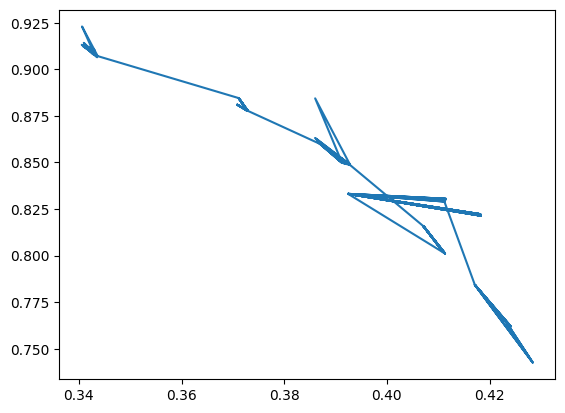

In [33]:
import matplotlib.pyplot as plt
# create a figure and axis
fig, ax = plt.subplots()

# plot column1 on x-axis and column2 on y-axis
ax.plot(k_df['silhoutte_score'], k_df['davies_bouldin_score'])
# show the plot
plt.show()

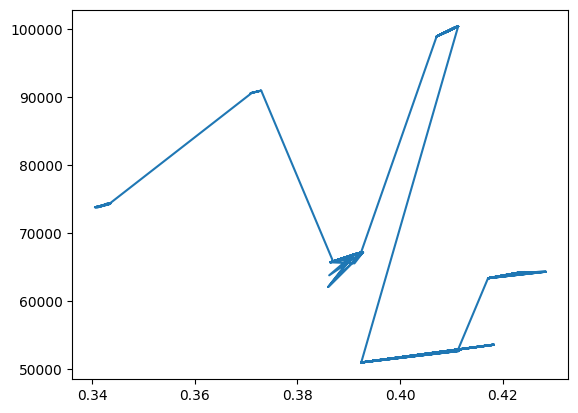

In [34]:
import matplotlib.pyplot as plt
# create a figure and axis
fig, ax = plt.subplots()

# plot column1 on x-axis and column2 on y-axis
ax.plot(k_df['silhoutte_score'], k_df['calinski_harabasz_score'])
# show the plot
plt.show()

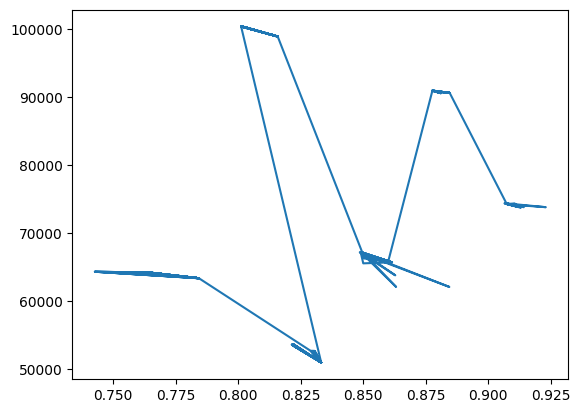

In [35]:
import matplotlib.pyplot as plt
# create a figure and axis
fig, ax = plt.subplots()

# plot column1 on x-axis and column2 on y-axis
ax.plot(k_df['davies_bouldin_score'], k_df['calinski_harabasz_score'])
# show the plot
plt.show()